In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from tensorflow import keras

In [9]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 1.   Veri önişleme 

In [69]:
# veri yükleme işlemi
df = pd.read_csv("datasets_2_breast-cancer.csv")

In [70]:
df[0:50]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [71]:
labelencoder = LabelEncoder()   # diagnosis kolonu kategorik veri olduğu için(M ve B ) numerik veriye dönüştürme işlemi yapılır.

In [72]:
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis']) # dönüştürüp aynı sütuna numerik veri yazılır

In [73]:
df[0:50]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [74]:
print(df.nunique()) # sutunlarda yeralan verilerin benzersiz sayıları

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [67]:
df.shape # 33 adet features ve 569 satır

(569, 31)

In [75]:
# id ve unnamed kolanları atılması gerekir.

df = df.drop(columns=["id","Unnamed: 32"]) 

In [76]:
df.shape  # 31 features

(569, 31)

In [77]:
kopya_satir = df.duplicated()      # kopya varsa true dönecektir...
print(kopya_satir.any())            

# df.drop_duplicates(inplace=True)   benzer satırları silmek için kullanılır

False


In [21]:
print(df.describe())  # dataset ile ilgili istatiksel bilgiler görüntülenir.

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

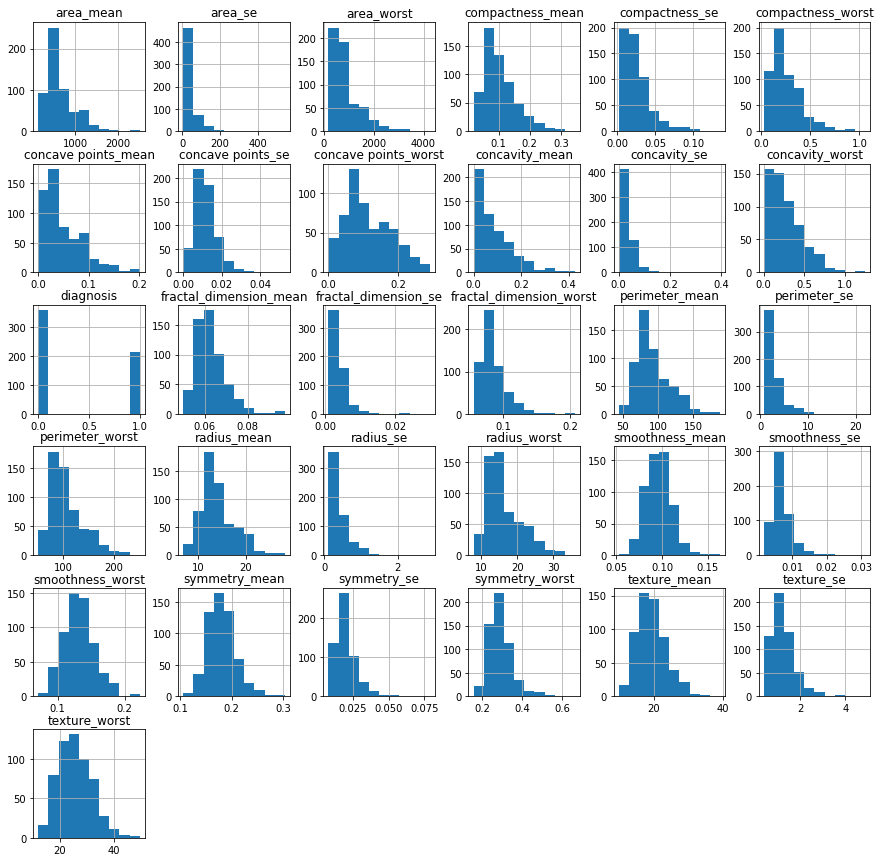

In [78]:
df.hist(figsize=(15,15))
pyplot.show()

# eğer çok fazla kolon normal dağılıma uymuyorsa transform işlemi yapılabilir.

In [79]:
dataset = df.values # kolon isimleri atılır.

In [80]:
dataset

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [25]:
dataset.shape

(569, 31)

In [81]:
# kolon içierisinde yeralan değerler sayısal olarak büyük olması (örneğin : area_mean kolonu)
#hesaplama esnasında nerönların sönmesine sebep olabilir.
# kolon değerlerini normalleştirme işlemi yapılır.

min_max_scaler = MinMaxScaler()               # 0 ile 1 arasıda değerleri trasnform eder
dataset = min_max_scaler.fit_transform(dataset)

In [82]:
dataset[:,4] # area_mean kolonu 

array([0.36373277, 0.50159067, 0.44941676, 0.10290562, 0.4892895 ,
       0.14150583, 0.38027572, 0.18426299, 0.15961824, 0.14099682,
       0.27753977, 0.27041357, 0.4154825 , 0.27113468, 0.18443266,
       0.218579  , 0.22948038, 0.27796394, 0.47359491, 0.17934252,
       0.15970308, 0.05531283, 0.23792153, 0.53467656, 0.32284199,
       0.32627784, 0.21264051, 0.40318134, 0.24979852, 0.34426299,
       0.40063627, 0.12602333, 0.32059385, 0.43202545, 0.28152704,
       0.30795334, 0.20763521, 0.16131495, 0.23554613, 0.17633086,
       0.17794274, 0.09654295, 0.40742312, 0.17039236, 0.16458112,
       0.39554613, 0.024772  , 0.16589608, 0.12971368, 0.17709438,
       0.12063627, 0.1816755 , 0.1247508 , 0.37730647, 0.24148462,
       0.1126193 , 0.42778367, 0.21777306, 0.16275716, 0.03435843,
       0.0714316 , 0.03321315, 0.21302227, 0.04979852, 0.15079533,
       0.2226087 , 0.05340403, 0.10629905, 0.04538706, 0.15227996,
       0.41845175, 0.0426299 , 0.33336161, 0.1868929 , 0.13887

In [83]:
# datasetinnin train ve test seti olarak ayıralım
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

455 114


In [84]:
    # train setimizi Label larından ayırma işlemi gerçekleştirilir. (diagnosis ayrı bir dizi olacaktır.) 
    
    dataX, dataY = [],[]
    
    for i in range(len(train)):
        a = train[i , 1:32]
        dataX.append(a)
        dataY.append(train[i ,0:1])

trainX = np.array(dataX)
trainY = np.array(dataY)

In [85]:
trainY[0:20]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [86]:
# diagnosis kolonu ayrılmışmı kontrol edelim.
trainX.shape 

(455, 30)

In [87]:
    dataX, dataY = [], []            # test setimizi label lardan ayırıyoruz (label = diagnosis)

    for i in range(len(test)):
        a = test[i , 1:32]
        dataX.append(a)
        dataY.append(test[i , 0:1])

testX = np.array(dataX)
testY =np.array(dataY)

In [88]:
testY[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [89]:
testX.shape

(114, 30)

#                             2. Model kurulumu ve Tahminleme                     #

In [90]:
classifiers = [
    
    KNeighborsClassifier(3),
    
    SVC( C=1.0, kernel="rbf", gamma='auto', probability=True),
   
    DecisionTreeClassifier(),
    
    GaussianNB() ]

In [91]:

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(trainX, trainY)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(testX)
    acc = accuracy_score(testY, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
   
       
print("*"*39)

KNeighborsClassifier
****Results****
Accuracy: 94.7368%
SVC
****Results****
Accuracy: 97.3684%
DecisionTreeClassifier
****Results****
Accuracy: 86.8421%
GaussianNB
****Results****
Accuracy: 92.1053%
***************************************


C:\Users\enginseven\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\enginseven\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enginseven\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Yapay Sinir Ağları Model kurulum ve Tahminleme

In [112]:
###########################################################

###################### Nerual Networks ####################


model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [113]:
#  opt = keras.optimizers.Adam(learning_rate=0.0007)  learning rate manuel ayarlama için kullanılabilir.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # learninRate varsayılan = 0.001

In [114]:
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
455/455 [==============================] - 1s 1ms/step - loss: 0.6522 - accuracy: 0.8198
Epoch 2/50
455/455 [==============================] - 0s 189us/step - loss: 0.4828 - accuracy: 0.8989
Epoch 3/50
455/455 [==============================] - 0s 198us/step - loss: 0.2805 - accuracy: 0.9143
Epoch 4/50
455/455 [==============================] - 0s 213us/step - loss: 0.1916 - accuracy: 0.9275
Epoch 5/50
455/455 [==============================] - 0s 209us/step - loss: 0.1553 - accuracy: 0.9407
Epoch 6/50
455/455 [==============================] - 0s 204us/step - loss: 0.1458 - accuracy: 0.9407
Epoch 7/50
455/455 [==============================] - 0s 218us/step - loss: 0.1163 - accuracy: 0.9560
Epoch 8/50
455/455 [==============================] - 0s 202us/step - loss: 0.1044 - accuracy: 0.9626
Epoch 9/50
455/455 [==============================] - 0s 202us/step - loss: 0.1022 - accuracy: 0.9582
Epoch 10/50
455/455 [==============================] - 0s 204us/step - loss: 0.0881 

In [115]:
testPredict = model.predict_classes(testX)

In [116]:
acc = accuracy_score(testY, testPredict)
print(acc)

0.9824561403508771


In [117]:
precision = precision_score(testY, testPredict, average='binary')


recall = recall_score(testY, testPredict, average='binary')

f1score = f1_score(testY, testPredict, average='binary')

results = confusion_matrix(testY, testPredict)

In [118]:
f1score

0.9615384615384616

In [119]:
results

array([[87,  1],
       [ 1, 25]], dtype=int64)

In [120]:
recall

0.9615384615384616

In [122]:
precision

0.9615384615384616